In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
from random import randint
#from statsmodels.tsa.seasonal import seasonal_decompose


In [2]:
data = pd.read_csv('BTC-USD_2.csv')
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-01-01,320.434998,320.434998,314.002991,314.248993,314.248993,8036550
1,2015-01-02,314.079010,315.838989,313.565002,315.032013,315.032013,7860650
2,2015-01-03,314.846008,315.149994,281.082001,281.082001,281.082001,33054400
3,2015-01-04,281.145996,287.230011,257.612000,264.195007,264.195007,55629100
4,2015-01-05,265.084015,278.341003,265.084015,274.473999,274.473999,43962800


In [3]:
Date1 = data['Date']
Price = data['Open']
new_data = []
new_data.append(pd.DataFrame({'Date':Date1,
                              'Price': Price
                              }))
new_data_df = pd.concat(new_data)
new_data_df.head()

,Date,Price
0,2015-01-01,320.434998
1,2015-01-02,314.079010
2,2015-01-03,314.846008
3,2015-01-04,281.145996
4,2015-01-05,265.084015


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3034 entries, 2015-01-01 to 2023-04-22
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Price   3034 non-null   float64
dtypes: float64(1)
memory usage: 47.4 KB


<Axes: xlabel='Date'>

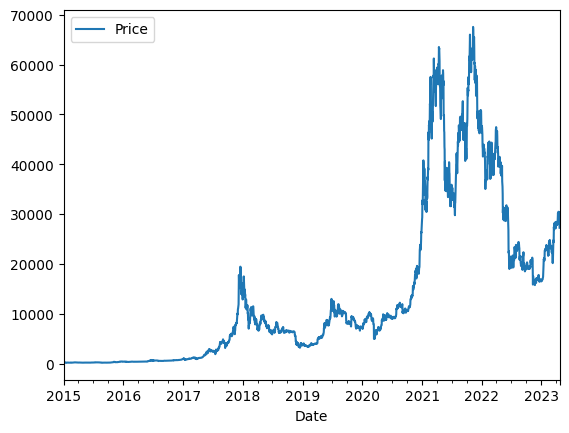

In [4]:
new_data_df.set_index('Date',inplace=True)
new_data_df.index=pd.to_datetime(new_data_df.index)
#drop null values
new_data_df.dropna(inplace=True)
new_data_df.info()
new_data_df.plot()

In [5]:
result=seasonal_decompose(new_data_df['Price'], model='multiplicable', period=365)
result.plot()

NameError: name 'seasonal_decompose' is not defined

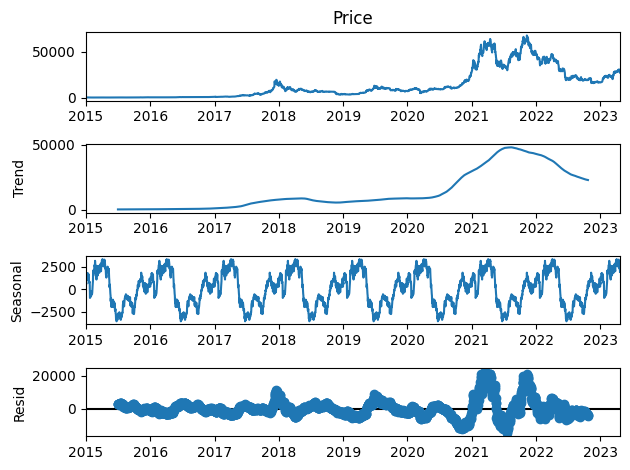

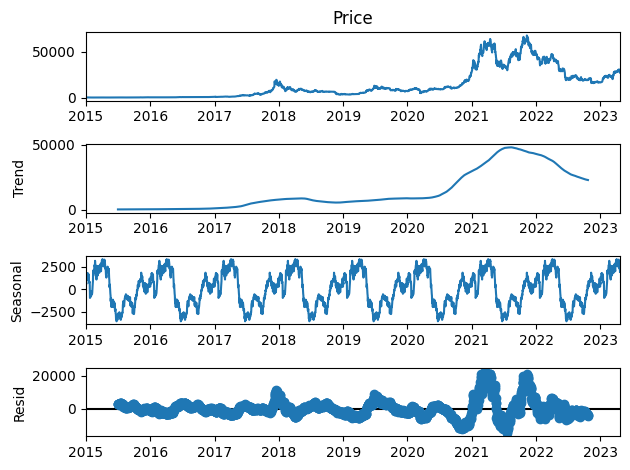

In [ ]:
result=seasonal_decompose(new_data_df['Price'], model='additive', period=365)
result.plot()

In [6]:
# Perform ADF test - Dickey - Fuller
from statsmodels.tsa.stattools import adfuller
result = adfuller(new_data_df['Price'])

# Print test statistic and p-value
print("ADF test statistic:", result[0])
print("p-value:", result[1])

ADF test statistic: -1.5848266162601123
p-value: 0.4912109821851601


In [7]:
# Perform KPSS test - Kwiatkowski-Phillips-Schmidt-Shin
from statsmodels.tsa.stattools import kpss
result = kpss(new_data_df['Price'], regression='ct')

# Print test statistic and p-value
print("KPSS test statistic:", result[0])
print("p-value:", result[1])

KPSS test statistic: 0.5422347195021804
p-value: 0.01


c:\Users\razva\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\stattools.py:2018: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  warnings.warn(


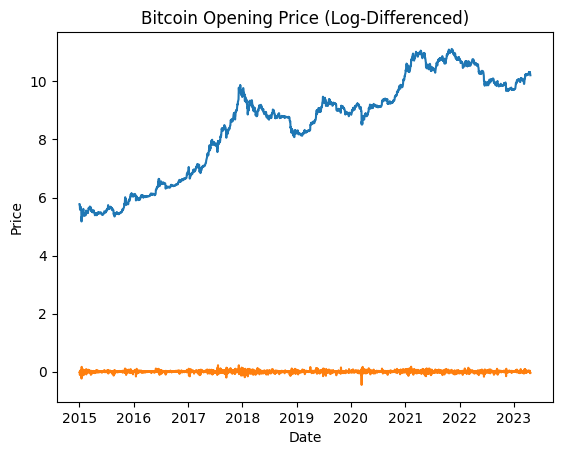

In [8]:
# Apply logarithmic transformation
price_log = np.log(new_data_df['Price'])

# Apply first-order differencing
price_log_diff = price_log.diff().dropna()

plt.plot(price_log)
# Plot the transformed series
plt.plot(price_log_diff)
plt.title("Bitcoin Opening Price (Log-Differenced)")
plt.xlabel("Date")
plt.ylabel("Price")
plt.show()

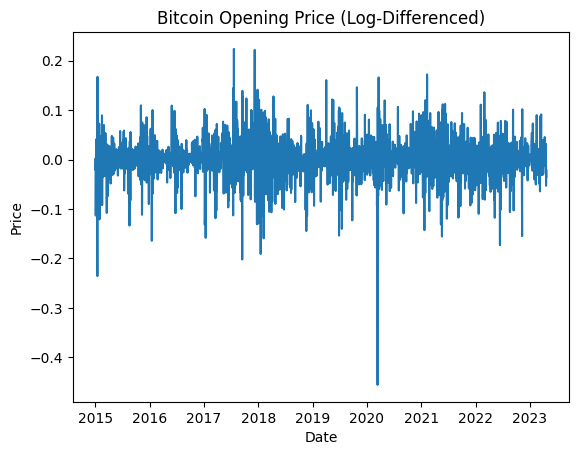

In [9]:
plt.plot(price_log_diff)
plt.title("Bitcoin Opening Price (Log-Differenced)")
plt.xlabel("Date")
plt.ylabel("Price")
plt.show()
#As we can see, the time series becomes nearly stationary in the first differencing. So, we will set the value of d equal to 1.

In [10]:
# Perform ADF test - Dickey - Fuller
from statsmodels.tsa.stattools import adfuller
result = adfuller(price_log_diff)

# Print test statistic and p-value
print("ADF test statistic:", result[0])
print("p-value:", result[1])

ADF test statistic: -56.11468076587921
p-value: 0.0


c:\Users\razva\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


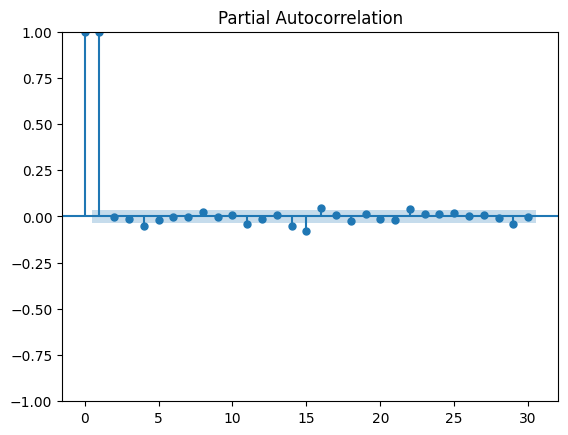

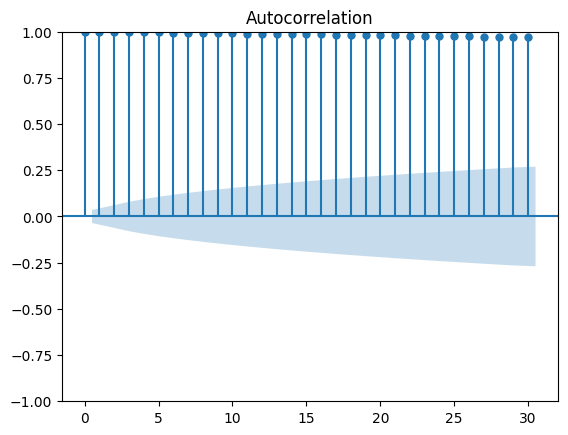

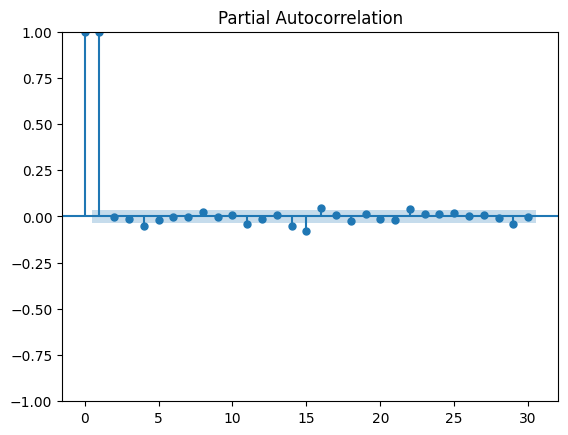

In [11]:
# Plot autocorrelation - for log
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(price_log, lags=30)
# Plot partial autocorrelation
plot_pacf(price_log, lags=30)

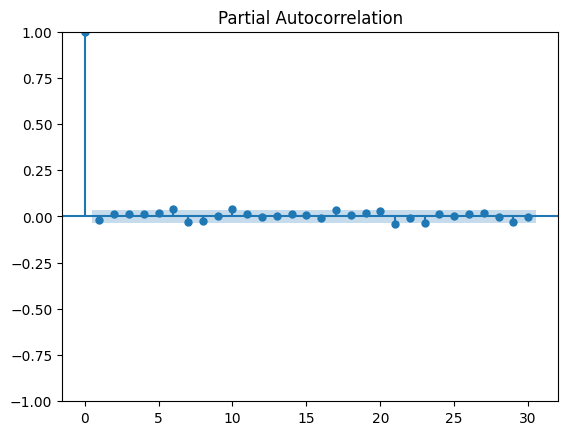

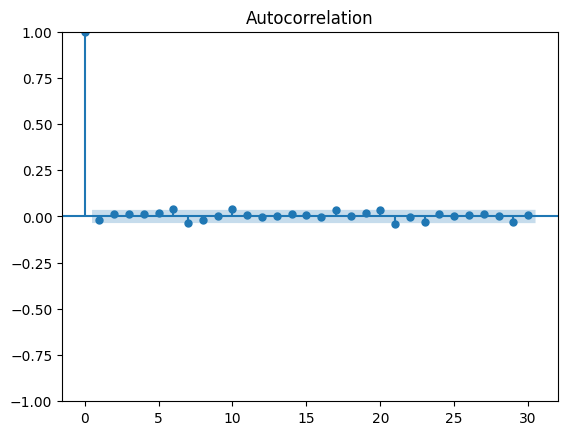

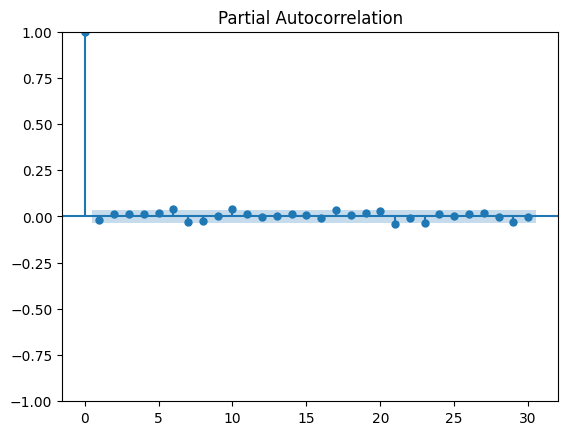

In [12]:
# Plot autocorrelation - for log-differenced
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(price_log_diff, lags=30)
# Plot partial autocorrelation
plot_pacf(price_log_diff, lags=30)

#finding the order of the AR Model
In the Partial autocorrelation plot, the light blue area shows the significant threshold value, and every vertical line indicates the PACF values at each time spot. So in the plot, only the vertical lines that exceed the light blue area are considered significant. We can see that PACF lag 1 is significant since it is well above the signature line. So, we will set the p value equal to 1.
An ACF (autocorrelation function) is a correlation between the observations at the current time spot and those at previous time spots. Like how we looked at the PACF plot for the number of AR terms, we will look at the ACF plot for the number of MA terms. An MA term is simply the error of the lagged forecast.
We can see that couple of lags are well above the signature line, but we will fix q to 1 one vertical line is quite significant in the plot.

So we have seted the parameter d=1

In [16]:
from statsmodels.tsa.arima_model import ARIMA

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#finding the order of the AR Model
model = ARIMA(price_log_diff, order=(1,2,1))
# Training arima modeling 
model_fit = model.fit()
model_fit.summary()

NotImplementedError: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been removed in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and statsmodels.tsa.SARIMAX.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained. It also offers alternative specialized
parameter estimators.


In [ ]:
new_data_df['Price'].dtype

dtype('float64')

Train size: 2730
Test size: 304


<Axes: xlabel='Date'>

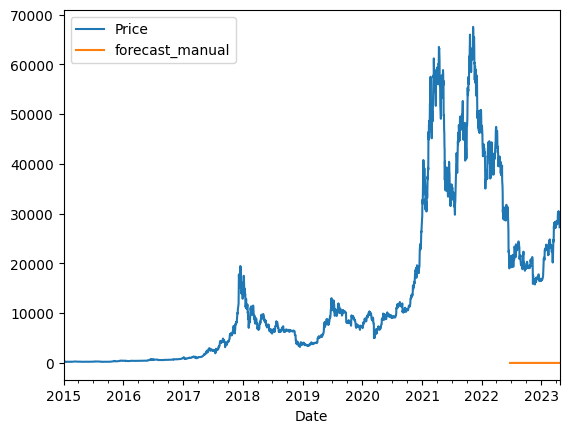

In [ ]:
# Get the length of the data
n = len(new_data_df['Price'])

# Calculate the cut-off point as 80% of the length
cut_off = int(n * 0.9)

# Split the data into train and test sets
train_data = new_data_df['Price'][:cut_off]
test_data = new_data_df['Price'][cut_off:]

# Print the lengths of train and test sets
print('Train size:', len(train_data))
print('Test size:', len(test_data))


forecast_test =model_fit.forecast(len(test_data))
forecast_test = np.exp(forecast_test)
new_data_df['forecast_manual'] = [None]*len(train_data)+list(forecast_test)

new_data_df.plot()


In [ ]:
new_data_df

,Price,forecast_manual
Date,,
2015-01-01,320.434998,NaN
2015-01-02,314.079010,NaN
2015-01-03,314.846008,NaN
2015-01-04,281.145996,NaN
2015-01-05,265.084015,NaN
...,...,...
2023-04-18,29449.091797,0.968283
2023-04-19,30394.187500,0.968276
2023-04-20,28823.683594,0.968269


In [ ]:
import pmdarima as pm
auto_arima = pm.auto_arima(train_data, stepwise=False, seasonal=False)
auto_arima

ARIMA(order=(2, 1, 2), scoring_args={}, suppress_warnings=True)

In [ ]:
auto_arima.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 2730
Model:               SARIMAX(2, 1, 2)   Log Likelihood              -22189.809
Date:                Sun, 23 Apr 2023   AIC                          44391.618
Time:                        18:00:12   BIC                          44427.089
Sample:                    01-01-2015   HQIC                         44404.438
                         - 06-22-2022                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      6.9209     17.859      0.388      0.698     -28.083      41.924
ar.L1          0.8148      0.011     73.648      0.000       0.793       0.836
ar.L2         -0.9424      0.010    -94.749      0.000      -0.962      -0.923
ma.L1         -0.8487      0.011    -78.156      0.000      -0.870      -0.827
ma.L2          0.9528      0.009    100.529      0.000       0.934       0.971
sigma2      6.836e+05   6489.008    105.352      0.000    6.71e+05    6.96e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.04   Jarque-Bera (JB):             27439.23
Prob(Q):                              0.85   Prob(JB):                         0.00
Heteroskedasticity (H):            1866.37   Skew:                            -0.32
Prob(H) (two-sided):                  0.00   Kurtosis:                        18.52
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

<Axes: xlabel='Date'>

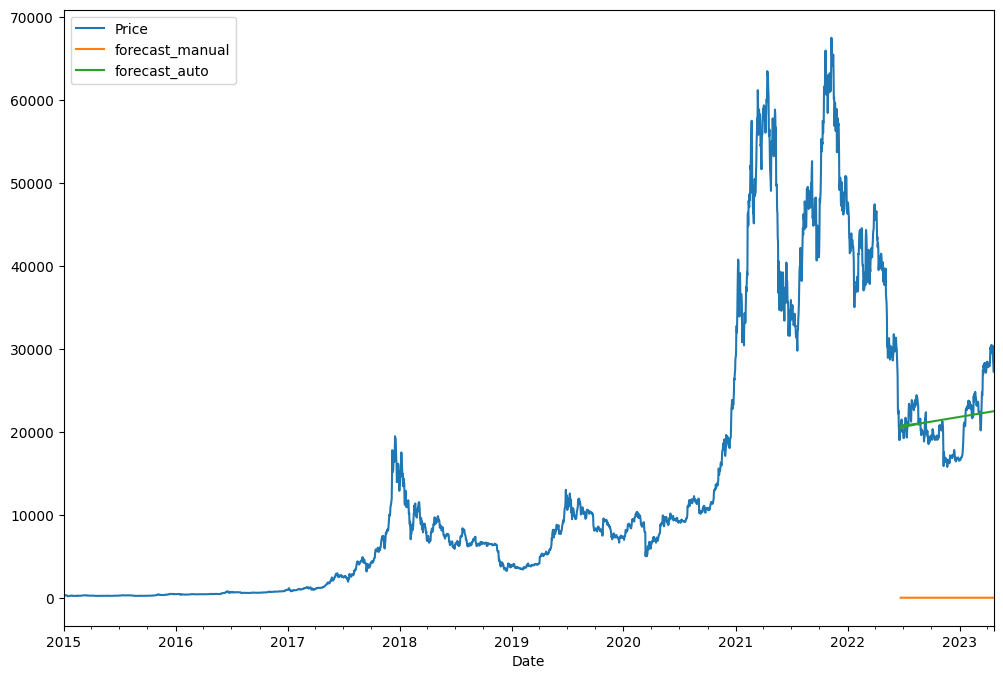

In [ ]:
forecast_test_auto = auto_arima.predict(n_periods=len(test_data))
forecast_test = np.exp(forecast_test)
new_data_df['forecast_auto'] = [None]*len(train_data)+list(forecast_test_auto)

new_data_df.plot(figsize=(12,8))

In [ ]:
new_data_df

,Price,forecast_manual,forecast_auto
Date,,,
2015-01-01,320.434998,NaN,NaN
2015-01-02,314.079010,NaN,NaN
2015-01-03,314.846008,NaN,NaN
2015-01-04,281.145996,NaN,NaN
2015-01-05,265.084015,NaN,NaN
...,...,...,...
2023-04-18,29449.091797,0.968283,22468.430409
2023-04-19,30394.187500,0.968276,22474.582799
2023-04-20,28823.683594,0.968269,22480.747392
